In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from func import *

# Advection Equation

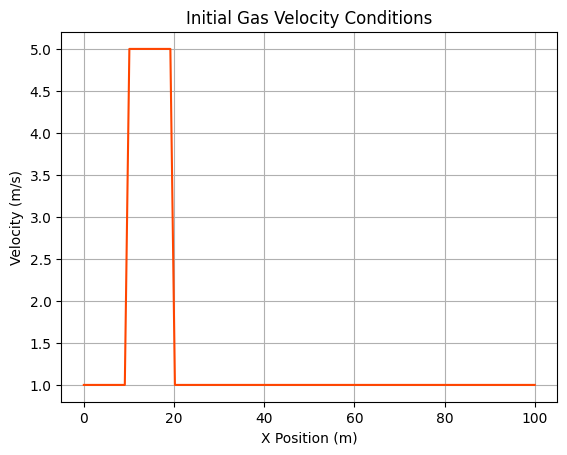

In [6]:
##### INITIALIZATION #################################
c     = 5 # m/s                          # initial gas velocity at spike
e     = 1 # m/s                           # initial gas velocity elsewhere
N     = 100                               # number of plot points   
Niter = 100                               # number of iterations for time
x     = np.linspace(0,100,N)              #
dx    = x[1]-x[0]                         # change in x
dt    = 0.5*dx/c                          # change in t
rho_g = 1.6 # kg/m^3                      # gas density
dia_p = 115e-6 #m                         # particle diameter
A     = np.pi*0.25*dia_p**2               # particle projected area
rho_p = 2500 # kg/m^3                     # particle density
M     = rho_p * 1/6 * dia_p**3 * np.pi    # particle mass
mu    = 2e-5 # kg/ms                      # dynamic viscosity

# ARRAYS
Fd_arr = []
Fd_arr.append(0.0)
up_arr = []
up_arr.append(0.0)
xp_arr = []
xp_arr.append(50.0)
ug_arr = []
ug_arr.append(e)
t_arr = []
t_arr.append(0)
######################################################

u = np.ones(N)
u[0] = e
u[10:20] = c

plt.plot(x, u, color='orangered')
plt.title(f'Initial Gas Velocity Conditions')
plt.ylabel('Velocity (m/s)')
plt.xlabel('X Position (m)')
plt.grid()
plt.show()

In [4]:
for j in range(Niter):
    t_arr.append(t_arr[-1] + dt)
    
    for i in range(N-1):
        uL = u[i]
        uR = u[i+1]
        u[i+1] = (uL*c*dt + uR*(dx - c*dt))/dx
        
    u[0] = u[N-1]
    
    ############# PARTICLE SOLVER #############################
    ug_temp = kernel2(xp_arr[-1] , 'p' , u , dx)
    ug_arr.append(ug_temp)
    
    Cd = Cd_Sternin(0) 
    # Cd = Cd_Loth(Re, ug_temp, up_arr[-1], Tg, Tp, D, rhog)
    Fd_arr.append(Cd * rho_g * A * abs(ug_temp - up_arr[-1]) * (ug_temp - up_arr[-1]) / 2)
    
    up_arr.append(up_arr[-1] + Fd_arr[-1] * dt / M)
    
    xp_arr.append(xp_arr[-1] + up_arr[-1] * dt)
    ###########################################################
    
   # if (j%10 == 0):
        # plt.plot(x,u)
        # plt.plot(xp0,ug_temp,marker = 'x')
        # plt.show()

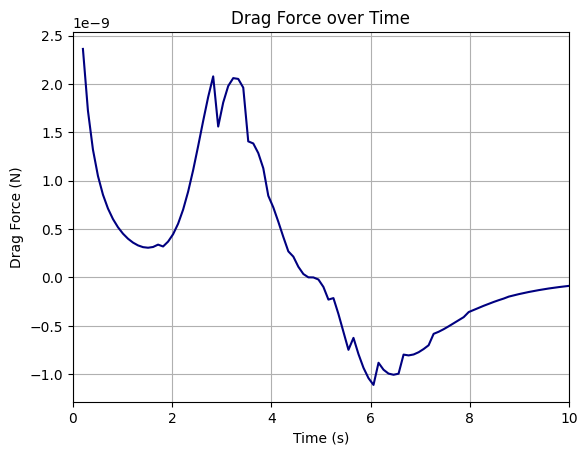

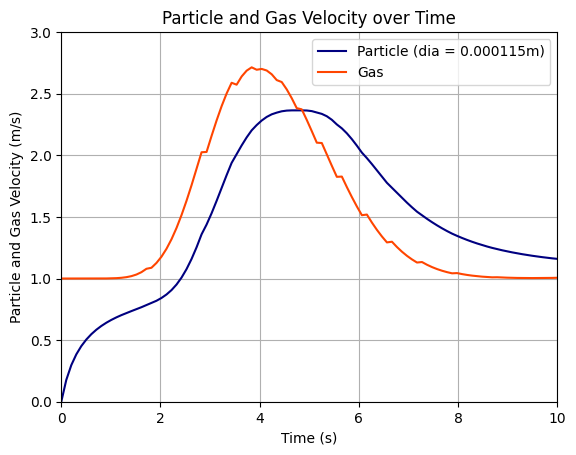

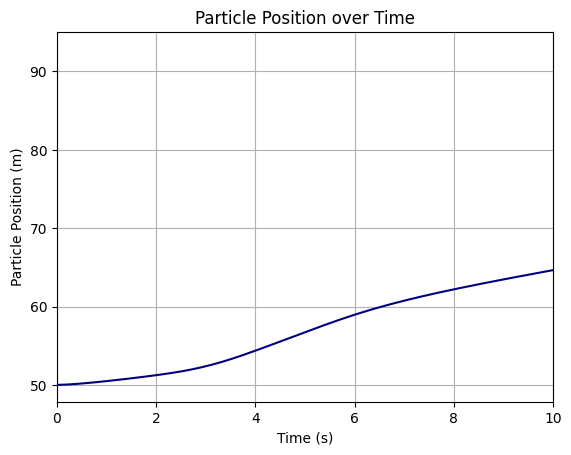

In [5]:
plt.plot(t_arr[2:], Fd_arr[2:], color = 'navy')
plt.title('Drag Force over Time')
plt.ylabel('Drag Force (N)')
plt.xlabel('Time (s)')
plt.xlim(0,10)
plt.grid()
plt.show()

plt.plot(t_arr, up_arr, color = 'navy', label = f'Particle (dia = {dia_p}m)')
plt.plot(t_arr, ug_arr, color = 'orangered', label = 'Gas')
plt.title('Particle and Gas Velocity over Time')
plt.ylabel('Particle and Gas Velocity (m/s)')
plt.xlabel('Time (s)')
plt.xlim(0,10)
plt.ylim(0,3)
plt.legend()
plt.grid()
plt.show()

plt.plot(t_arr, xp_arr, color = 'navy')
plt.title('Particle Position over Time')
plt.ylabel('Particle Position (m)')
plt.xlabel('Time (s)')
plt.xlim(0,10)
plt.grid()
plt.show()

In [4]:
kernel2(50, 'p', u, dx)

1.0644793275391013

# Animation

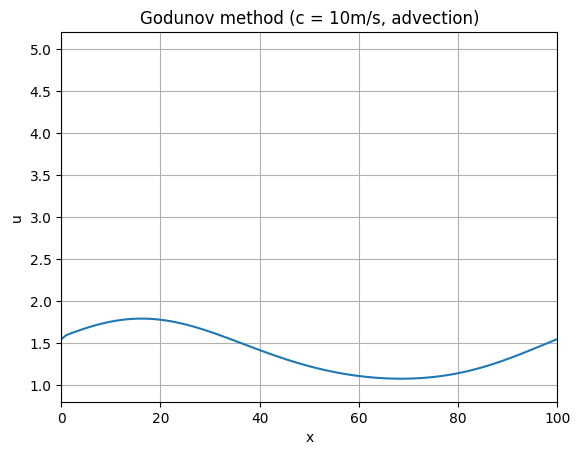

In [5]:
fig, ax = plt.subplots()

c = 10 #m/s
N = 100 # number of plot points
x = np.linspace(0,100,N)
dx = x[1]-x[0]
dt = 0.5*dx/c

vals = np.ones(N)
vals[0] = 1
vals[10:20] = 5

u, = ax.plot(x, vals)

def animate(i):
    for i in range(N-1):
        uL = vals[i]
        uR = vals[i+1]
        vals[i+1] = (uL*c*dt+uR*(dx-c*dt))/dx
        
    vals[0] = vals[N-1] 
    
    u.set_ydata(vals)  # update the data.
    return u,

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=200)

writergif = animation.PillowWriter(fps=30)
ani.save('advection.gif',writer=writergif)

plt.title(f'Godunov method (c = {c}m/s, advection)')
plt.ylabel('u')
plt.xlabel('x')
plt.xlim(0, 100)
plt.grid()
plt.show()

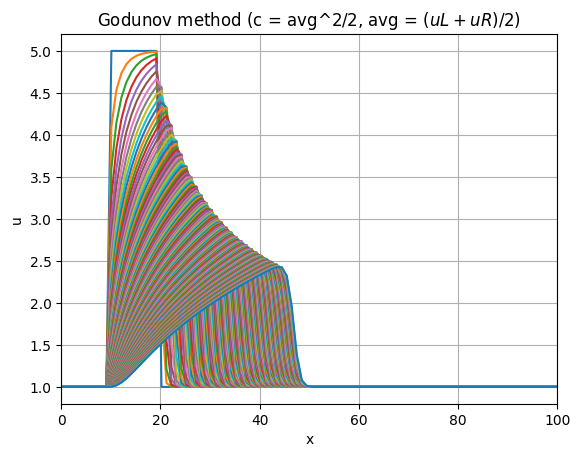

In [6]:
c = 10 #m/s
N = 100 # number of plot points
x = np.linspace(0,100,N)
dx = x[1]-x[0]
dt = 0.5*dx/c

u = np.ones(N)
u[0] = 1

u[10:20] = 5

plt.plot(x,u)

for j in range(200):
    for i in range(N-1):
        uL = u[i]
        uR = u[i+1]
        avg = (uL + uR)/ 2
        c = avg**2/2
        u[i+1] = (uL*c*dt+uR*(dx-c*dt))/dx
        
    u[0] = u[N-1]    
    plt.plot(x,u)

plt.title(f'Godunov method (c = avg^2/2, avg = $(uL + uR)/2$)')
plt.ylabel('u')
plt.xlabel('x')
plt.xlim(0, 100)
plt.grid()
plt.show()

# Animation

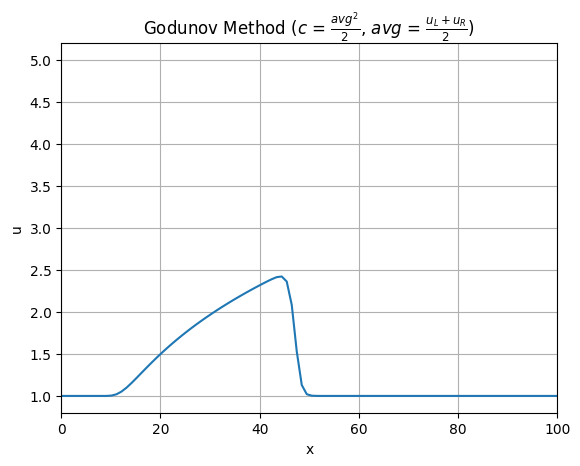

In [7]:
fig, ax = plt.subplots()

c = 10 #m/s
N = 100 # number of plot points
x = np.linspace(0,100,N)
dx = x[1]-x[0]
dt = 0.5*dx/c

vals = np.ones(N)
vals[0] = 1
vals[10:20] = 5

u, = ax.plot(x, vals)

def animate(i):
    for i in range(N-1):
        uL = vals[i]
        uR = vals[i+1]
        avg = (uL + uR)/ 2
        c = avg**2/2
        vals[i+1] = (uL*c*dt+uR*(dx-c*dt))/dx
        
    vals[0] = vals[N-1] 
    
    u.set_ydata(vals)  # update the data.
    return u,

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=200)

writergif = animation.PillowWriter(fps=30)
ani.save('godunov_method.gif',writer=writergif)

plt.title(r'Godunov Method ($c$ = $\frac{{{avg^2}}}{{{2}}}$, $avg$ = $\frac{{{u_L + u_R}}}{{{2}}}$)')
plt.ylabel('u')
plt.xlabel('x')
plt.xlim(0, 100)
plt.grid()
plt.show()

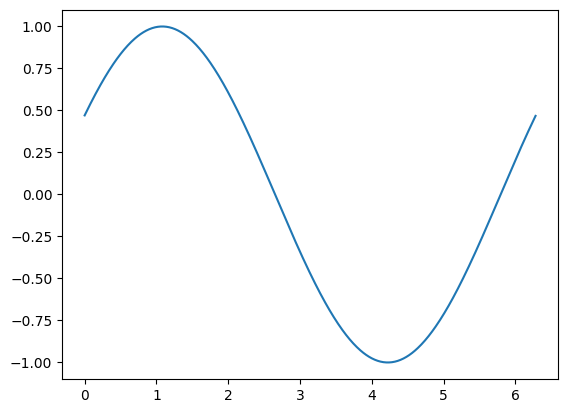

In [11]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
u, = ax.plot(x, np.sin(x))


def animate(i):
    u.set_ydata(np.sin(x + i / 100))  # update the data.
    return u,


ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use
writergif = animation.PillowWriter(fps=30)
ani.save('test.gif',writer=writergif)

plt.show()